In [67]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso


## 1. Growth regressions: Lasso and CV


### 1

Here is the code for the pre-processing of the data set. 

In [250]:
data = pd.read_excel("millions.xls", "BARROSHO", na_values=".")
labels = pd.read_excel("millions.XLS", "Variable code", index_col="#")
data.dropna(subset=["X1"], inplace=True)
data.dropna(axis=1, thresh=data.shape[0] - 10, inplace= True)
data

,#,code,country,gamma,X1,X3,X4,X5,X10,X11,...,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62
0,1,DZA,Algeria,0.013690,7.438972,0.46,0,0,8.0650,10.1800,...,0.0,0.00,0.005,0.99,0.005,2855.520020,0.196,0.0,0.836,0.000
1,2,AGO,Angola,0.000569,6.786717,0.21,1,0,9.4600,10.5300,...,0.0,0.00,0.000,0.00,0.150,2319.385498,0.268,0.0,0.000,0.000
2,3,BEN,Benin,-0.006586,7.019297,0.27,1,0,6.3482,4.8646,...,0.0,0.00,0.000,0.15,0.080,1372.623291,0.009,0.0,0.000,0.000
3,4,BWA,Botswana,0.056195,6.284134,0.42,1,0,7.8620,8.2100,...,0.0,0.00,0.000,0.00,0.250,210.918488,0.533,5.0,0.000,0.000
4,5,HVO,Burkina Faso,0.004206,6.152733,0.08,1,0,4.9348,5.6025,...,0.0,0.00,0.000,0.25,0.000,NaN,0.001,1.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,YUG,Yugoslavia,0.026471,7.577122,1.00,0,0,NaN,NaN,...,0.0,0.00,0.000,0.18,0.010,8358.188477,0.025,1.0,0.000,0.000
130,131,AUS,Australia,0.018897,8.972083,1.00,0,0,7.3570,4.3300,...,0.0,0.00,0.000,0.00,0.500,4185.827148,0.038,5.0,0.000,0.950
131,132,FJI,Fiji,0.018968,7.627058,0.85,0,0,7.0730,7.4100,...,0.0,0.38,0.000,0.08,0.430,108.980400,0.039,5.0,0.000,0.008
132,133,NZL,New Zealand,0.011319,8.979038,1.00,0,0,9.3140,5.8500,...,0.0,0.00,0.000,0.00,0.520,884.044434,0.011,5.0,0.000,0.900


### 2

In [251]:
data.iloc[:, 3:] = data.iloc[:, 3:].apply(lambda col: col.fillna(col.median()), axis = 0)
data

,#,code,country,gamma,X1,X3,X4,X5,X10,X11,...,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62
0,1,DZA,Algeria,0.013690,7.438972,0.46,0,0,8.0650,10.1800,...,0.0,0.00,0.005,0.99,0.005,2855.520020,0.196,0.0,0.836,0.000
1,2,AGO,Angola,0.000569,6.786717,0.21,1,0,9.4600,10.5300,...,0.0,0.00,0.000,0.00,0.150,2319.385498,0.268,0.0,0.000,0.000
2,3,BEN,Benin,-0.006586,7.019297,0.27,1,0,6.3482,4.8646,...,0.0,0.00,0.000,0.15,0.080,1372.623291,0.009,0.0,0.000,0.000
3,4,BWA,Botswana,0.056195,6.284134,0.42,1,0,7.8620,8.2100,...,0.0,0.00,0.000,0.00,0.250,210.918488,0.533,5.0,0.000,0.000
4,5,HVO,Burkina Faso,0.004206,6.152733,0.08,1,0,4.9348,5.6025,...,0.0,0.00,0.000,0.25,0.000,1926.450378,0.001,1.0,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,YUG,Yugoslavia,0.026471,7.577122,1.00,0,0,8.2085,7.5725,...,0.0,0.00,0.000,0.18,0.010,8358.188477,0.025,1.0,0.000,0.000
130,131,AUS,Australia,0.018897,8.972083,1.00,0,0,7.3570,4.3300,...,0.0,0.00,0.000,0.00,0.500,4185.827148,0.038,5.0,0.000,0.950
131,132,FJI,Fiji,0.018968,7.627058,0.85,0,0,7.0730,7.4100,...,0.0,0.38,0.000,0.08,0.430,108.980400,0.039,5.0,0.000,0.008
132,133,NZL,New Zealand,0.011319,8.979038,1.00,0,0,9.3140,5.8500,...,0.0,0.00,0.000,0.00,0.520,884.044434,0.011,5.0,0.000,0.900


### 3 

With LASSO, it's important to standardize the covariates in your model. LASSO operates on relative size of the covariates, so it's required to standardize your covariates so that a change of units will not adversely impact your LASSO. Additionally, standardizing the output variable results in the $R^2$ being just $1 - (y-\hat{y})^2$

### 4

In [253]:
X_std = (data.iloc[:, 5:] - data.iloc[:, 5:].mean())/data.iloc[:, 5:].std()
X_raw = data.iloc[:, 5:]
y_std = (data.iloc[:, 4] - data.iloc[:, 4].mean())/data.iloc[:, 4].std()
y_raw = data.iloc[:, 4]

X = X_std
y = y_std

The interpretation of a $\beta_j = 0.5$ is that for an observation of $x_j$ that is a standard deviation above its mean, then the dependent variable changes by a standard deviation of $0.5$ above its mean. When $y$ is unstandardized, then an increase of $x_i$ in one standard deviation, then $y$ increases by $0.5$ in its units.

### 5

The following functions will be used to clean up training. 

In [254]:
# rmse utility
def rmse(y_hat, y):
    """ 
    @y_hat: predicted values
    @y: true values
    """
    res = np.sqrt(
        np.mean(
            (y_hat - y)**2
        )
    )
    return res

In [255]:
# Rsq utility
def Rsq(y_hat, y):
    """ 
    returns 1 - Rsquared
    """
    ss_res = np.sum(
        (y - y_hat)**2
    )
    ss_tot = np.sum(
        (y - np.mean(y))**2
    )
    Rsq = ss_res/ss_tot 
    return Rsq

In [256]:
def cv_err(X: np.ndarray, y: np.ndarray, model, err=rmse, folds= 5, split=None, **kwargs):
    """ Returns Cross-Validated Error
    @X: The observation matrix (Num_Samples, Num_Features)
    @y: The outcome vector (Num_Samples,)
    @model: the model you are evaluating. This should have a fit and a predict method.
    @err: The err you want to evaluate the model with. The default is out of sample root mean squared error. 
    This function should take in y_hat and y as positional args.
    @folds: The number of folds you want to evaluate with. 
    @split: An optional argument if you want to pass in a boolean or 0-1 matrix creating your own split. True elements are used for testing.
    If this is passed, folds will be overwritten to split.shape[0], or 1 if a 1-D array is passed.
    The shape should be (folds, Num_Samples) or (Num_Samples,)
    """
    # init data
    y_hat = np.full_like(y, fill_value=np.nan)
    N = X.shape[0]
    rng = np.random.default_rng()
    reg = model(**kwargs)

    # init idxs
    if split is not None:
        if type(split) is not np.ndarray:
            split = split.to_numpy()
        if split.ndim == 1:
            split = split[np.newaxis, :]
        folds = split.shape[0]
        idxs = np.linspace(1, folds, num=folds) @ split.astype(int) - 1
    else:
        idxs = rng.permutation(N) % folds
    
    # train and predict
    for i in range(folds):
        # exclude class i from training
        X_train = X[idxs != i]
        y_train = y[idxs != i]
        reg.fit(X_train, y_train)
        # class i is the test set
        X_test = X[idxs == i]
        y_hat[idxs == i] = reg.predict(X_test)
    return err(y_hat[~np.isnan(y_hat)], y[~np.isnan(y_hat)])

The following is the code for our OLS model

In [257]:
# init params
model = ['X16', 'X46', 'X53']
rich = y > y.quantile(0.8)

# train and evaluate
err = cv_err(X.loc[:, model], y, LinearRegression, folds=1, split=rich)
print(f"The out of sample root mean square error is {err}")

The out of sample root mean square error is 1.5503099720133933


### 6

In [258]:
def train_model(X, y, model, err=rmse, folds=5, split=None, **kwargs):
    """ 
    Returns model trained with one optimal hyperparameter. 
    @X: The observation matrix (Num_Samples, Num_Features)
    @y: The outcome vector (Num_Samples,)
    @model: the model you are evaluating. This should have a fit and a predict method.
    @err: The err you want to evaluate the model with. The default is out of sample root mean squared error. 
    This function should take in y_hat and y as positional args.
    @folds: The number of folds you want to evaluate with. 
    @split: An optional argument if you want to pass in a boolean or 0-1 matrix creating your own split. True elements are used for testing
    If this is passed, folds will be overwritten to split.shape[0], or 1 if a 1-D array is passed.
    The shape should be (folds, Num_Samples) or (Num_Samples,)
    """
    # init alphas
    nonzero = [k for k in X.abs().to_numpy().flatten() if k != 0]
    m = np.min(nonzero)
    M = np.max(nonzero)
    alphas = np.geomspace(m/100, M*100, num=1000)

    best_err = np.inf
    best_alpha = 0
    for alpha in alphas:
        cur_err = cv_err(X, y, model, err=err, folds=folds, split=split, alpha=alpha, **kwargs)
        if cur_err < best_err:
            best_err = cur_err
            best_alpha = alpha
    return model(alpha = best_alpha, **kwargs)

In [259]:
reg = train_model(X, y, Lasso, folds=1, split=rich, warm_start=True)

In [261]:
# train best lasso
# both metrics were equivalent
reg.fit(X[~rich], y[~rich])
err = rmse(reg.predict(X[rich]), y[rich])
res_rich = pd.Series(reg.coef_, index=reg.feature_names_in_)[reg.coef_ != 0]
print(res_rich.head())
print(f"The number of covariates is {len(res_rich != 0)}")
print(f"The out of sample rmse is {err}")

X3     0.053509
X4    -0.049476
X11   -0.038831
X12    0.036031
X13    0.064056
dtype: float64
The number of covariates is 29
The out of sample rmse is 0.5451031747559477


### 7

If we have a random fold, we most likely will have the model perform better than in the previous split, since the random split will likely include some of the rich countries, and therefore be closer to the true distribution of the rich countries. The previous fold was very biased away from the wealthy countries, and so including any of the rich countries will get closer. However, we will alpha based on performance in the out of sample random fold instead of performance in the rich fold. This may bias our choice of alpha away from the alpha minimizing the out of sample error in the rich fold.

### 8

In [ ]:
rng = np.random.default_rng()
split_80 = (rng.binomial(1, 0.8, X.shape[0]) == 1)
reg = train_model(X, y, Lasso, folds=1, split=split_80, warm_start = True)

In [265]:
reg.fit(X[split_80], y[split_80])
err = rmse(reg.predict(X[rich]), y[rich])
print(f"The rmse of the model, with alpha = {reg.alpha}, tested on the wealthy, is {err}")

The rmse of the model, with alpha = 0.049561454650273826, tested on the wealthy, is 0.5007649157695985


This model performs very close to the previous one. It seems that although our data was heavily biased away from the test set, we still managed to select accurate covariates.

In [266]:
res_rand = pd.Series(reg.coef_, index=reg.feature_names_in_)
print(f"The covariates chosen by the random split, but not the rich split are {set(res_rand.index) - set(res_rich.index)}. \nThe covariates chosen by the rich split, but not the random split are {set(res_rich.index) - set(res_rand.index)}")

The covariates chosen by the random split, but not the rich split are {'X5', 'X10', 'X55', 'X56', 'X41', 'X36', 'X61'}. 
The covariates chosen by the rich split, but not the random split are set()


However, the random split selects a few more covariates that aren't selected in the previous model.

### 9

In [267]:
# Train LASSO with 5 folds
reg = train_model(X, y, Lasso, warm_start=True)

In [268]:
reg.fit(X, y)
res = pd.Series(reg.coef_, index=reg.feature_names_in_)
print(res[res != 0].head())
print(f"The number of features chosen, with alpha = {reg.alpha} is {np.sum(res != 0)}")
print(f"The average rmse on the rich countries sample is {rmse(reg.predict(X[rich]), y[rich])}")

X3     0.066765
X4    -0.033374
X12    0.000586
X13    0.021396
X21    0.190460
dtype: float64
The number of features chosen, with alpha = 0.02800381066978893 is 19
The average rmse on the rich countries sample is 0.4708418238671409


As shown above, 20 features were selected, and the out of sample rmse is 0.41. 

### 10

Prediction error was highest on the OLS model with the covariates X16, X46, and X53. The next two best models were very close to each other: the single 80-20 fold and the rich-poor fold. The best model was the 5-fold cross-validated model. This makes sense, since the LASSO models choose covariates that are more relevant than the 3 covariates that were selected for the OLS model. Additionally, I ran the single fold model a few times, and the error had very high variance, sometimes it had the best error, and sometimes it had far worse error. This makes sense, since the behavior of the estimator is very dependent on if the random split includes rich countries or not. If it does, it not only selects covariates that are correlated with the growth of rich countries, but the sample is closer to the distribution, so our linear estimator has lower generalization error. The 5-fold cross-validated estimator performs the best, almost all the time, except for when the 1-fold estimator selects many rich countries. The same logic follows as for the 1-fold estimator, except that the sample is distributed according to uniformly chosen country, not necessarily a wealthy country and since, if $X$ is the random variable of countries, $X | X \text{ is wealthy} \neq X$, our estimator will always be biased.

## 2. Ideas of datasets for final projects

### 1. 

The two project ideas I submitted are as follows:
1. Opioid Settlement Expenditures/Drug Related Deaths
2. The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients

### 2.

In [269]:
import matplotlib.pyplot as plt

In [375]:
data_raw = pd.read_excel("project ideas\default+of+credit+card+clients\default of credit card clients.xls", header=1, index_col=0)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\matth\AppData\Local\Temp\ipykernel_40128\2751600070.py:1: SyntaxWarning: invalid escape sequence '\d'
  data_raw = pd.read_excel("project ideas\default+of+credit+card+clients\default of credit card clients.xls", header=1, index_col=0)


In [379]:
data_raw

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
2,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
3,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
4,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
5,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29997,150000.0,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,0.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29998,30000.0,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,0.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0


In [376]:
data_raw = data_raw.astype(np.float64)


In [378]:
data = (data_raw - data_raw.mean())/data_raw.std()
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.136701,0.810147,0.185825,-1.057277,-1.245999,1.794534,1.782318,-0.696652,-0.666588,-1.530021,...,-0.672486,-0.663047,-0.652713,-0.341936,-0.227082,-0.296796,-0.308057,-0.314131,-0.293377,1.876347
2,-0.365974,0.810147,0.185825,0.858543,-1.029030,-0.874977,1.782318,0.138862,0.188743,0.234913,...,-0.621626,-0.606219,-0.597956,-0.341936,-0.213584,-0.240001,-0.244226,-0.314131,-0.180875,1.876347
3,-0.597192,0.810147,0.185825,0.858543,-0.161154,0.014860,0.111734,0.138862,0.188743,0.234913,...,-0.449723,-0.417181,-0.391623,-0.250287,-0.191884,-0.240001,-0.244226,-0.248679,-0.012122,-0.532933
4,-0.905483,0.810147,0.185825,-1.057277,0.164300,0.014860,0.111734,0.138862,0.188743,0.234913,...,-0.232369,-0.186726,-0.156576,-0.221187,-0.169358,-0.228641,-0.237842,-0.244162,-0.237126,-0.532933
5,-0.905483,-1.234302,0.185825,-1.057277,2.333990,-0.874977,0.111734,-0.696652,0.188743,0.234913,...,-0.346991,-0.348131,-0.331476,-0.221187,1.335012,0.271161,0.266429,-0.269034,-0.255183,-0.532933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,0.404752,-1.234302,1.451090,-1.057277,0.381269,0.014860,0.111734,0.138862,0.188743,0.234913,...,0.695462,-0.149257,-0.384386,0.171247,0.611038,-0.012647,-0.113562,0.013131,-0.237126,-0.532933
29997,-0.134756,-1.234302,1.451090,0.858543,0.815207,-0.874977,-0.723558,-0.696652,-0.666588,0.234913,...,-0.532915,-0.577682,-0.652713,-0.231028,-0.103953,0.214252,-0.299823,-0.314131,-0.293377,-0.532933
29998,-1.059629,-1.234302,0.185825,0.858543,0.164300,3.574208,2.617611,1.809891,-0.666588,0.234913,...,-0.347955,-0.324512,-0.327681,-0.341936,-0.256985,0.952709,-0.039964,-0.183226,-0.118999,1.876347


In [355]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1]

In [356]:
nonzero = [k for k in X.abs().to_numpy().flatten() if k != 0]
m = np.min(nonzero)
M = np.max(nonzero)
alphas = np.geomspace(m/2, M/200, num=50)
cv_coef = []
for alpha in alphas:
    reg = Lasso(alpha=alpha, fit_intercept=False)
    reg.fit(X, y)
    res = [alpha] + list(reg.coef_)
    cv_coef.append(res)

In [357]:
cv_coef = pd.DataFrame(cv_coef, columns = ['alpha'] + list(X.columns))

<Axes: xlabel='alpha'>

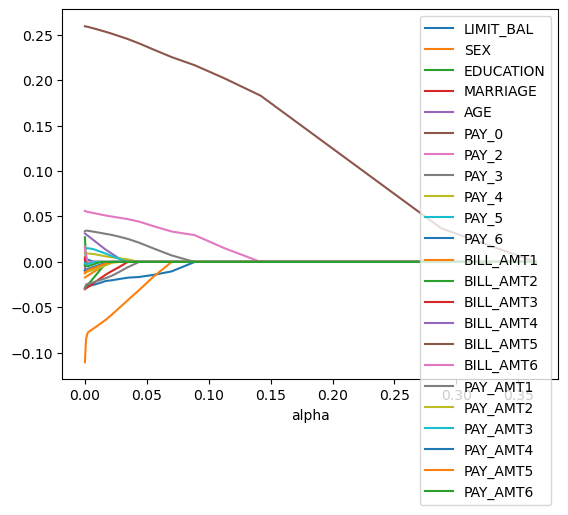

In [358]:
cv_coef.plot(x = 'alpha', y = list(X.columns))

### 3. 

Here we plot the graphs of the Limit_Bal for people who did not pay in different pay periods. Limit_Bal is the amount of credit given. $-1$ is the category for non-delinquet payments. $1$ is one month late, $2$ is 2 months late, and so on up to $9$ months late for each PAY_i. We plot the average Limit_Bal for each.

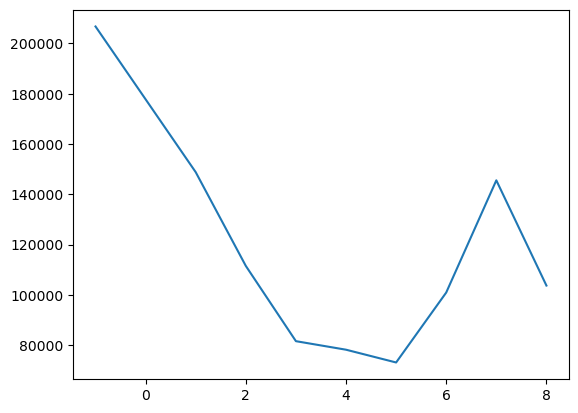

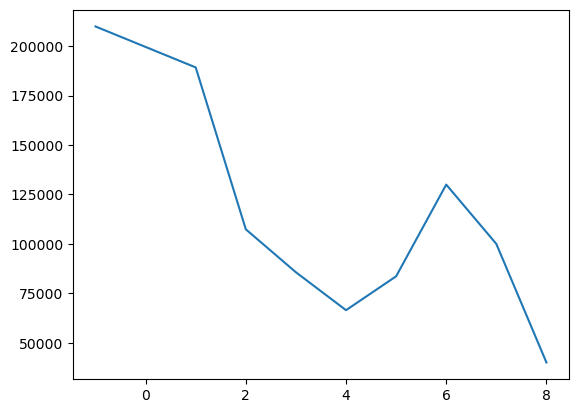

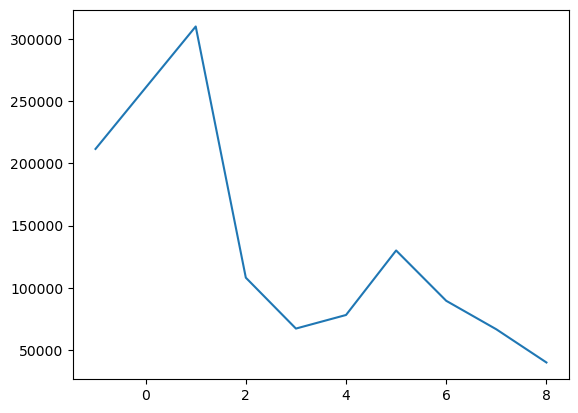

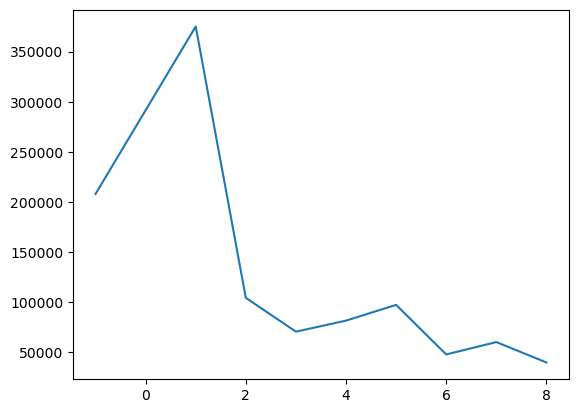

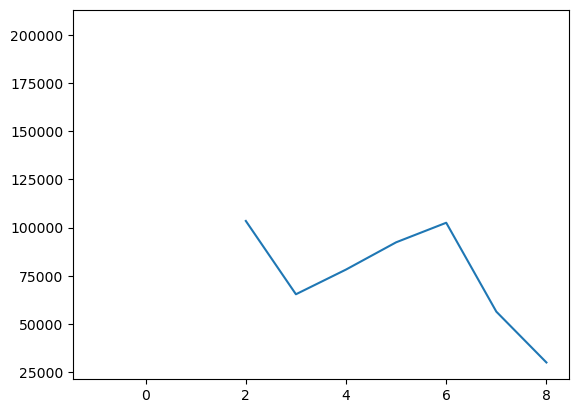

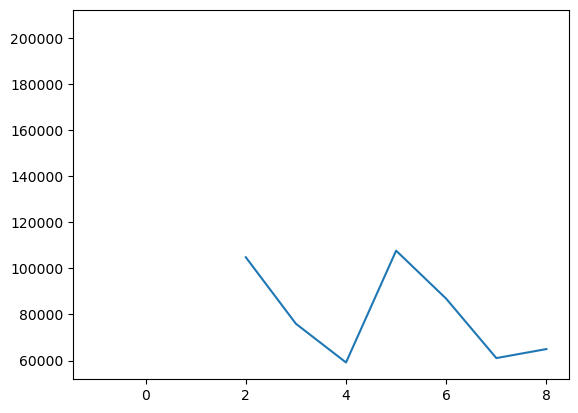

In [383]:
months_late = [-1] + list(range(1, 10))
for pay_period, df in data_raw.loc[:, 'PAY_0':'PAY_6'].items():
    limit_bals = []
    for m in months_late:
        m_late = data_raw[df == m]
        limit_bals.append(m_late['LIMIT_BAL'].mean())
    plt.figure()
    plt.plot(months_late, limit_bals)
    plt.show()

### 4. 

We notice that as time goes on, the amount of credit that individuals are given changes substantially, and in a very non-linear way. It is expected that the banks would provide the same amount of credit for every pay period, since it is assume that their policy is unchanging. Additionally, individuals who are 5 months delinquent are afforded significantly more credit than months around them. This is also counter-intuitive, since it is expected that the more delinquent you are on your payments, the less credit you would be afforded.